<a href="https://colab.research.google.com/github/koulkoudakis/tf-neural-network-classification/blob/main/tf_neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Neural Network Classification with TensorFlow

In this notebook, we will learn how to build neural networks for classification problems.

Types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=18)

In [2]:
# Check features
X

array([[-0.97062946,  0.03782132],
       [-0.81032756, -0.04961955],
       [ 0.55650471,  0.79362129],
       ...,
       [ 0.06833668,  1.03462829],
       [-0.95074224, -0.27235243],
       [-0.83796162, -0.5500797 ]])

In [3]:
# Check labels
y

array([0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,

In [4]:
X[0]

array([-0.97062946,  0.03782132])

Our data is hard to interpret now, so we will visualize it

In [5]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,-0.970629,0.037821,0
1,-0.810328,-0.049620,1
2,0.556505,0.793621,0
3,0.228634,-1.039017,0
4,0.769528,-0.327903,1
...,...,...,...
995,-0.671113,0.459951,1
996,-0.340622,-0.718236,1
997,0.068337,1.034628,0
998,-0.950742,-0.272352,0


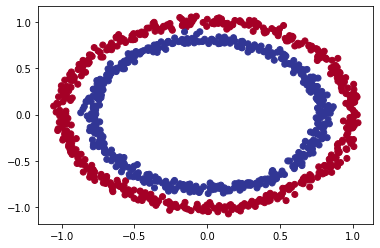

In [6]:
# Visualize with a plot 
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

## Input and output shapes


In [7]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
# How many samples we're working with
len(X), len(y)

(1000, 1000)

In [9]:
# View the first example of features and labels
X[0], y[0]

(array([-0.97062946,  0.03782132]), 0)

## Steps in modelling

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tune model
6. Evaluate model...

In [10]:
import tensorflow as tf
tf.__version__

# Set random seed
tf.random.set_seed(42)

# 1. Create model using Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])
# 3. Fit model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 5.1809 - accuracy: 0.5840
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 5.1278 - accuracy: 0.5580
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 4.9459 - accuracy: 0.5380
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 4.9308 - accuracy: 0.5430
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 4.8591 - accuracy: 0.5370


In [11]:
# Let's try to improve our model by training for longer
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 989us/step - loss: 0.6932 - accuracy: 0.5000


[0.6931741833686829, 0.5]

Since we're working on a binary classification problem, an accuracy of 50% is basically like a random guess. We Will try to add an extra layer.

In [12]:
# Set random seed
tf.random.set_seed(18)

# Create model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# Fit model
model_2.fit(X,y,epochs=200,verbose=0)

# Evaluate model
model_2.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

In [13]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

## Improving model
1. Creating model - add more layers or increase number of hidden units within layer
2. Compiling model - choose different optimization function eg. Adam vs. SGD
3. Fitting a model - fit our model to more epochs, change callbacks

In [14]:
# Set random seed
tf.random.set_seed(18)

# Create model (this time with 3 layers)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit model
model_3.fit(X, y, epochs=100, verbose=0)

In [15]:
# Evaluate model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6941 - accuracy: 0.4860


[0.6941264867782593, 0.4860000014305115]

To visualize our model's predictions, we will create a function `plot_decision_boundary()` to:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of different X values
* Make predictions across the meshgrid
* Plot predictions as well as a line between zones


In [16]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define axis boundaries of plot and create a meshgrid
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() +0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() +0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X value
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("Doing multiclass classification\n")
    # We must reshape our prediction
    y_pred=np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Doing binary classification\n")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

Doing binary classification



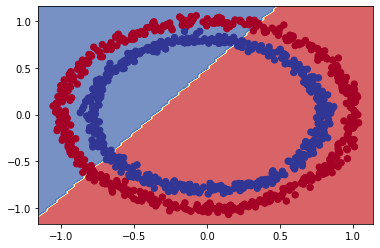

In [17]:
# Check predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [20]:
# Let's see if our model can be used for a regression problem...

# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

X_regression, y_regression

# Split regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]

y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit model to regression data
model_3.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100


ValueError: ignored

Model has to be compiled for regression instead of binary classification

In [21]:
# Set random seed
tf.random.set_seed(18)

# Create model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), 
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)                           
])

# Compile model, this time with regression-specific loss function
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])
# Fit model
model_4.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 604.5295 - mae: 604.5295
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 498.6613 - mae: 498.6613
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 395.2053 - mae: 395.2053
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 291.3028 - mae: 291.3028
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 184.3638 - mae: 184.3638
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 78.8259 - mae: 78.8259
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 62.5050 - mae: 62.5050
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 82.7695 - mae: 82.7695
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 65.9174 - mae: 65.9174
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 43.4713 - mae: 43.4713
Epoch 11/100
5/5 [==============================]

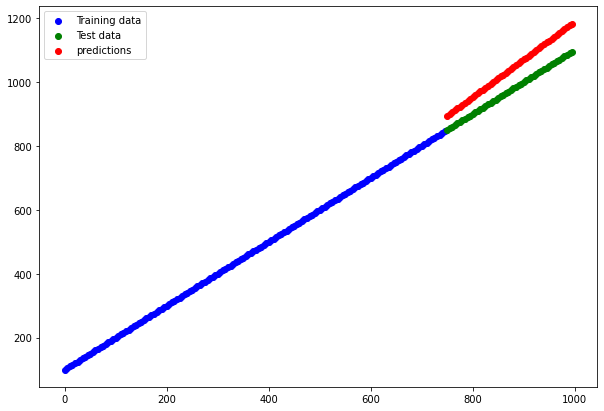

In [22]:
# Make predictions with trained model
y_reg_preds = model_4.predict(X_reg_test)

# Plot model predictions against regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Test data')
plt.scatter(X_reg_test, y_reg_preds, c='r', label='predictions')
plt.legend();

## Non-linearity

In [28]:
# Set random seed
tf.random.set_seed(18)

# Create model
model_5 = tf.keras.Sequential([
 tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# Compile model
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy']
)

# Fit model
history = model_5.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 6.0198 - accuracy: 0.4840
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 6.0055 - accuracy: 0.4850
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 6.0022 - accuracy: 0.4850
Epoch 4/100
32/32 [==============================] - 0s 992us/step - loss: 5.9888 - accuracy: 0.4850
Epoch 5/100
32/32 [==============================] - 0s 995us/step - loss: 5.9865 - accuracy: 0.4850
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 5.9753 - accuracy: 0.4840
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 5.9712 - accuracy: 0.4850
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 5.9628 - accuracy: 0.4850
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 5.9082 - accuracy: 0.4860
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 5.8681 - accuracy: 0.4850
Epoch

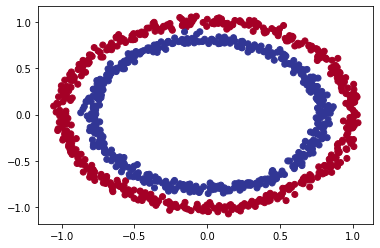

In [31]:
# Check out data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

Doing binary classification



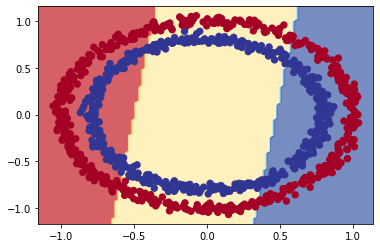

In [32]:
# Check desision boundary for latest function
plot_decision_boundary(model=model_5,
                       X=X,
                       y=y)

Let's try to build our first neural network with a non-linear activation function

In [33]:
# Set random seed
tf.random.set_seed(18)

# Create a model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)                             
])

# Compile model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# Fit model

history = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 6.0198 - accuracy: 0.4840
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 6.0055 - accuracy: 0.4850
Epoch 3/100
32/32 [==============================] - 0s 954us/step - loss: 6.0022 - accuracy: 0.4850
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 5.9888 - accuracy: 0.4850
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 5.9865 - accuracy: 0.4850
Epoch 6/100
32/32 [==============================] - 0s 986us/step - loss: 5.9753 - accuracy: 0.4840
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 5.9712 - accuracy: 0.4850
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 5.9628 - accuracy: 0.4850
Epoch 9/100
32/32 [==============================] - 0s 986us/step - loss: 5.9082 - accuracy: 0.4860
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 5.8681 - accuracy: 0.4850
Epo

In [39]:
# We will try adding extra layers and neurons

# Set random seed
tf.random.set_seed(18)

# Create model
model_7 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(4, activation='relu')
                               ])

# Compile model
model_7.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# Fit model
history = model_7.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 0s 1ms/step - loss: 4.3098 - accuracy: 0.1720
Epoch 2/250
32/32 [==============================] - 0s 1ms/step - loss: 4.1124 - accuracy: 0.1590
Epoch 3/250
32/32 [==============================] - 0s 1ms/step - loss: 3.9236 - accuracy: 0.1560
Epoch 4/250
32/32 [==============================] - 0s 1ms/step - loss: 3.8011 - accuracy: 0.1520
Epoch 5/250
32/32 [==============================] - 0s 1ms/step - loss: 3.6837 - accuracy: 0.1440
Epoch 6/250
32/32 [==============================] - 0s 1ms/step - loss: 3.5856 - accuracy: 0.1430
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 3.2774 - accuracy: 0.1350
Epoch 8/250
32/32 [==============================] - 0s 1ms/step - loss: 3.1990 - accuracy: 0.1390
Epoch 9/250
32/32 [==============================] - 0s 1ms/step - loss: 3.1851 - accuracy: 0.1390
Epoch 10/250
32/32 [==============================] - 0s 1ms/step - loss: 3.1416 - accuracy: 0.1310
Epoch 11/

Doing multiclass classification



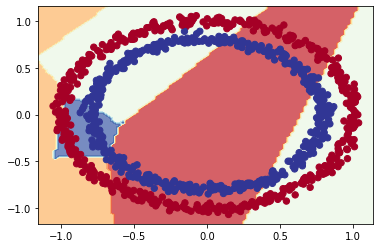

In [40]:
# Visualizing predictions
plot_decision_boundary(model_7, X, y)

In [41]:
X

array([[-0.97062946,  0.03782132],
       [-0.81032756, -0.04961955],
       [ 0.55650471,  0.79362129],
       ...,
       [ 0.06833668,  1.03462829],
       [-0.95074224, -0.27235243],
       [-0.83796162, -0.5500797 ]])

In [42]:
y

array([0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,

In [46]:
# Set random seed
tf.random.set_seed(18)

# Create model
model_8 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile model
model_8.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# Fit model
history = model_8.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6957 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5020
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6908 - accuracy: 0.5090
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6897 - accuracy: 0.5060
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6885 - accuracy: 0.5090
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6873 - accuracy: 0.5070
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6863 - accuracy: 0.5070
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6853 - accuracy: 0.5130
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6842 - accuracy: 0.5160
Epoch 11/

In [48]:
# Evaluate model
model_8.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.3022 - accuracy: 0.9720


[0.3022237718105316, 0.972000002861023]

Doing binary classification



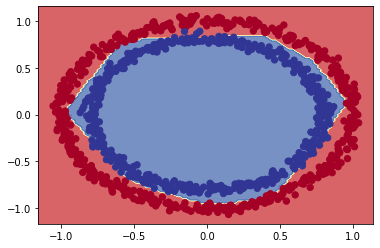

In [49]:
# Evaluate model
plot_decision_boundary(model_8, X, y)

The combination of **linear** and **non-linear** functions is one of the key fundamentals of neural networks.

In [51]:
# Create demo tensor
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

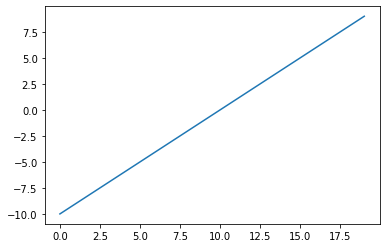

In [52]:
# Visualize demo tensor
plt.plot(A)

In [53]:
# We will replicate the sigmoid function - sigmoid(x) = 1 / (1+exp(-x))
def sigmoid(x):
  return 1 / (1+tf.exp(-x))

# Use sigmoid function on our tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

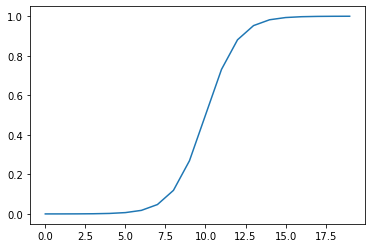

In [54]:
# Plot our tensor transformed by sigmoid
plt.plot(sigmoid(A));

In [55]:
# We will replicate relu function
def relu(x):
  return tf.maximum(0, x)

# Use relu on our tensor
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

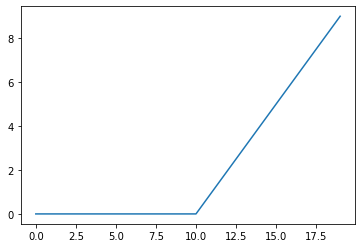

In [56]:
plt.plot(relu(A))

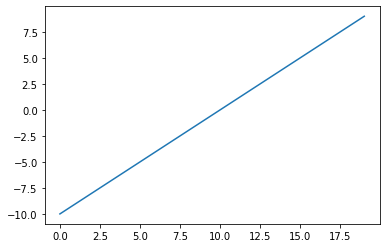

In [57]:
plt.plot(tf.keras.activations.linear(A))

## Evaluating and Improving our classification

In [58]:
# Check number of samples
len(X)

1000

In [61]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape

((800, 2), (200, 2))

In [67]:
# Recreate model to fit on training data and evaluate on testing data

# Set random seed
tf.random.set_seed(42)

# Create model
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')

])

# Compile model
model_9.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

# Fit model
history = model_9.fit(X,y,epochs=25)

Epoch 1/25
32/32 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.5080
Epoch 2/25
32/32 [==============================] - 0s 1ms/step - loss: 0.6738 - accuracy: 0.5690
Epoch 3/25
32/32 [==============================] - 0s 1ms/step - loss: 0.6514 - accuracy: 0.6690
Epoch 4/25
32/32 [==============================] - 0s 1ms/step - loss: 0.5999 - accuracy: 0.7440
Epoch 5/25
32/32 [==============================] - 0s 1ms/step - loss: 0.4885 - accuracy: 0.9110
Epoch 6/25
32/32 [==============================] - 0s 1ms/step - loss: 0.3391 - accuracy: 0.9680
Epoch 7/25
32/32 [==============================] - 0s 1ms/step - loss: 0.2151 - accuracy: 0.9860
Epoch 8/25
32/32 [==============================] - 0s 1ms/step - loss: 0.1255 - accuracy: 0.9940
Epoch 9/25
32/32 [==============================] - 0s 2ms/step - loss: 0.0839 - accuracy: 0.9990
Epoch 10/25
32/32 [==============================] - 0s 2ms/step - loss: 0.0598 - accuracy: 1.0000
Epoch 11/25
32/32 [

In [70]:
# Evaluate on test dataset
model_9.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0054 - accuracy: 1.0000


[0.0053567648865282536, 1.0]

Doing binary classification

Doing binary classification



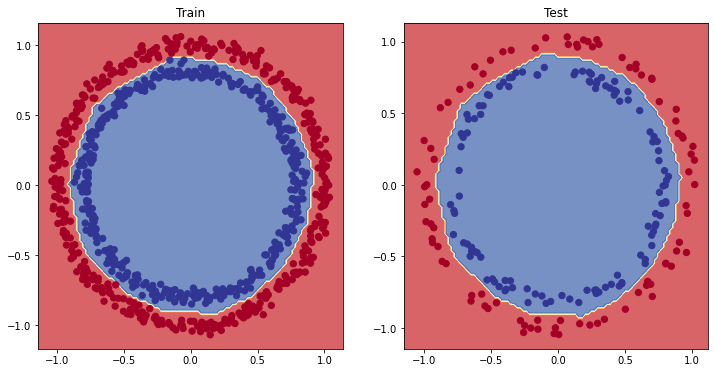

In [69]:
# Visualize predictions
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_9, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_9, X=X_test, y=y_test)
plt.show()

## Plotting loss curves

In [73]:
history.history['accuracy'][:5]

[0.5080000162124634,
 0.5690000057220459,
 0.6690000295639038,
 0.7440000176429749,
 0.9110000133514404]

In [75]:
# Convert history object into DataFrame
pd.DataFrame(history.history).head()

,loss,accuracy
0,0.691963,0.508
1,0.673803,0.569
2,0.651403,0.669
3,0.599928,0.744
4,0.488470,0.911


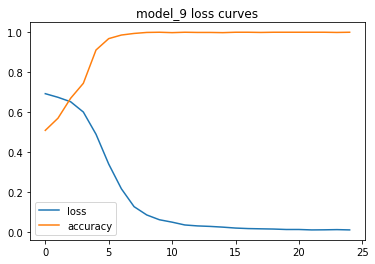

In [76]:
# Plot loss curves
pd.DataFrame(history.history).plot()
plt.title('model_9 loss curves');

**Note**: For many problems, the loss function decreasing means the model is improving (the prediction's it's making are getting closer to the ground truth labels.)